In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [55]:
path ="data/global_electricity_production_data.csv"
df = pd.read_csv(path)

In [56]:
df.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [57]:
df["year"] = df["date"].apply(lambda x: int(x.split("/")[2]))

In [58]:
df.head()

,country_name,date,parameter,product,value,unit,year
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh,2023
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh,2023
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh,2023
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh,2023
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh,2023


In [59]:
df["parameter"].value_counts()

Net Electricity Production        93318
Final Consumption (Calculated)     6036
Distribution Losses                6033
Total Exports                      5416
Total Imports                      5411
Used for pumped storage            4846
Remarks                              14
Name: parameter, dtype: int64

In [60]:
df = df.loc[(df["parameter"] == "Net Electricity Production") & (df["product"] == "Total Renewables (Hydro, Geo, Solar, Wind, Other)")]

In [61]:
df.pivot_table(index="country_name", columns="year", values=["value"], aggfunc="sum")

value                                                  \
year                   2010        2011        2012        2013        2014   
country_name                                                                  
Argentina               NaN         NaN         NaN         NaN         NaN   
Australia         24610.860   25078.374   29876.966   35667.676   32869.815   
Austria           45809.266   42207.865   52720.992   51826.710   51370.357   
Belgium            7681.649    9405.339   11518.663   12745.991   13199.087   
Brazil                  NaN         NaN         NaN         NaN         NaN   
Bulgaria                NaN         NaN         NaN         NaN         NaN   
Canada           366611.134  392288.660  398121.491  416479.892  414931.787   
Chile             24101.174   25689.737   24871.883   25642.855   29943.127   
China                   NaN         NaN         NaN         NaN         NaN   
Colombia                NaN         NaN         NaN         NaN   48591.614   
Costa Rica              NaN         NaN         NaN         NaN         NaN   
Croatia                 NaN         NaN         NaN         NaN         NaN   
Cyprus                  NaN         NaN         NaN         NaN         NaN   
Czech Republic     6235.555    7626.877    8402.173    9725.578    9689.015   
Denmark           12134.486   13891.649   14508.385   15667.377   17666.240   
Estonia             971.987    1102.370    1351.560    1144.092    1297.064   
Finland           23435.425   23407.943   27777.686   24828.089   25509.815   
France            81923.204   70281.812   89051.020  103151.674   98533.057   
Germany          107981.966  125766.644  144484.215  153312.682  163281.499   
Greece            10501.954    8372.052    9424.246   14354.967   12274.448   
Hungary            2808.989    2544.289    2495.515    2586.858    2892.040   
Iceland           16743.999   16848.998   17292.999   17995.000   17800.000   
India                   NaN         NaN         NaN         NaN         NaN   
Ireland            3886.106    5404.206    5440.341    5943.618    6640.248   
Italy             78785.184   83318.159   92377.523  111672.887  119834.336   
Japan            116146.160  116207.927  112872.466  119508.389  127801.768   
Korea              8877.013   10592.774   10578.650   12751.641   13490.703   
Latvia             3591.350    3026.934    4026.901    3406.183    2678.865   
Lithuania          1631.254    1650.941    1656.085    2018.798    2141.920   
Luxembourg         1617.060    1306.914    1355.914    1395.246    1446.538   
Malta                   NaN         NaN         NaN         NaN         NaN   
Mexico            45046.671   44372.956   41661.373   38894.262   52118.080   
Netherlands       10928.442   12009.844   12182.565   11846.548   11407.684   
New Zealand       32200.919   33141.869   31147.021   31445.925   33738.590   
North Macedonia         NaN         NaN         NaN         NaN         NaN   
Norway           117902.418  122675.930  144149.001  130388.998  138032.001   
Peru                    NaN         NaN         NaN         NaN         NaN   
Poland            10841.987   12819.097   16303.799   16735.026   19349.486   
Portugal          28351.645   24371.973   20120.078   30239.827   32006.033   
Serbia                  NaN         NaN         NaN         NaN         NaN   
Slovak Republic    6213.520    4711.824    5276.933    6146.994    5854.472   
Slovenia           4842.175    3938.338    4426.020    5306.019    6770.490   
Spain             98882.106   87854.001   88403.515  113395.136  111826.439   
Sweden            81503.036   83419.213   97469.801   82110.734   84938.736   
Switzerland       38796.510   35354.459   41755.870   41706.266   41856.425   
Turkey            55213.632   56781.928   63830.644   67756.034   51314.152   
United Kingdom    28875.265   37582.456   43540.110   55252.944   66298.304   
United States    456142.223  542625.391  522776.507  550184.829  568864.

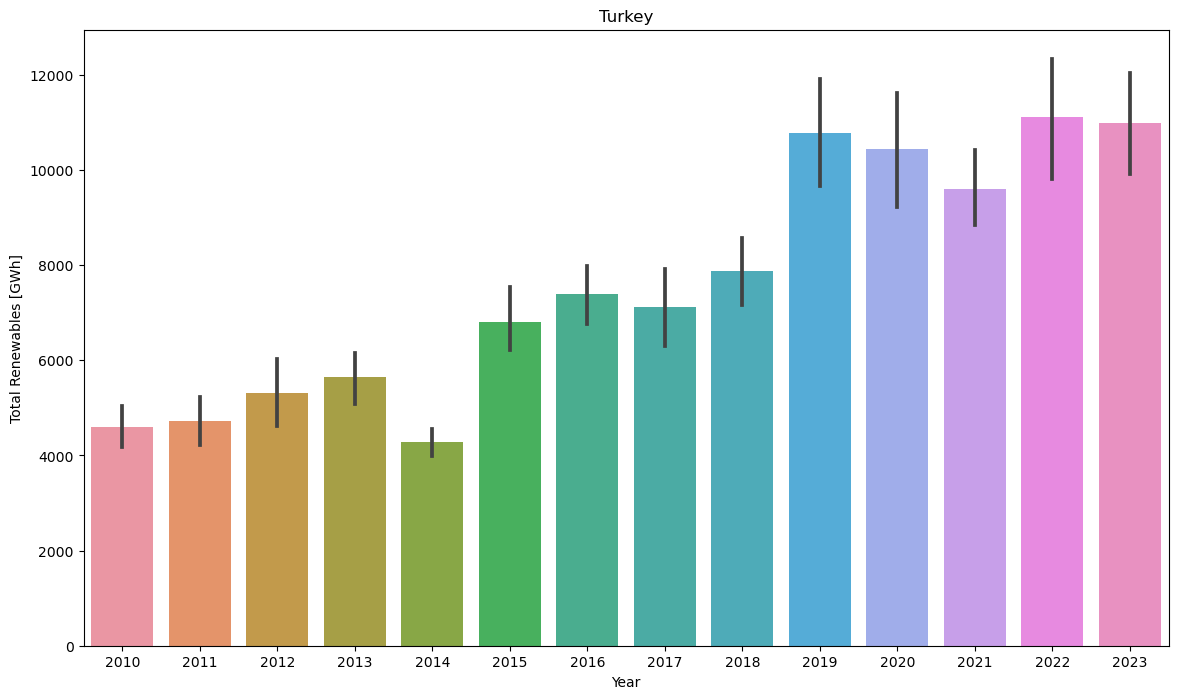

In [66]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(df.loc[df["country_name"] == "Turkey"], x="year", y="value")
ax = ax.set(xlabel='Year', ylabel='Total Renewables [GWh]', title='Turkey')